## Correlation and uncertainty - Part 1

#### Introduction
Consider a simple experiment in which the goal is to measure what is presumed to be a constant signal in the 
presence of a background.  For this example, assume that there is Gaussian noise on both the signal and the 
background.  In the first part of this notebook assume that you make several measurements of  the 'total' of 'background + noise', and then you make measurements of the 'noise' alone. The 'signal' will then be the 
difference between the 'total' and the 'noise.' For class on Tuesday execute the cells in this notebook, and then 
determine the value of the signal, with an uncertainty.  (There is nothing new here -- I just want you 
to become familiar with the 'experiment.'

Marty Ligare, September 2020

In [1]:
import numpy as np
from scipy import stats

import urllib  # For importing file from URL

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in the  notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file,
# or effected using mpl.rcParams[]
mpl.style.use('classic')
plt.rc('figure', figsize = (6, 4.5))    # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)     # Adjusts supblot parameters for new size

#### Download data from URL

In [3]:
fn = urllib.request.urlopen('http://www.eg.bucknell.edu/~phys310/skills/data_analysis/correlation_1.dat')
values_tot = np.loadtxt(fn)
fn = urllib.request.urlopen('http://www.eg.bucknell.edu/~phys310/skills/data_analysis/correlation_2.dat')
values_bg = np.loadtxt(fn)

n_trials = len(values_tot)

<IPython.core.display.Javascript object>


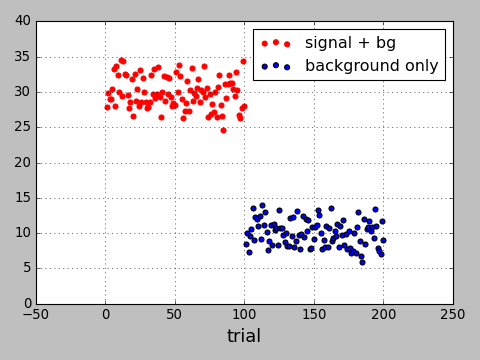

In [4]:
plt.figure()
x = np.linspace(1,n_trials,n_trials)
plt.scatter(x, values_tot, color='r', label='signal + bg')
plt.scatter(x+n_trials, values_bg, label='background only')
plt.xlabel('trial')
plt.legend()
plt.ylim(0,40)
plt.grid();

### Determine signal (with associated uncertainty)

In [5]:
mean_tot = np.mean(values_tot)
std_tot = np.std(values_tot)
mean_bg = np.mean(values_bg)
std_bg = np.std(values_bg)

alpha_tot = std_tot/np.sqrt(n_trials - 1)
alpha_bg = std_bg/np.sqrt(n_trials - 1)

signal = mean_tot - mean_bg
alpha_sig = np.sqrt(alpha_tot**2 + alpha_bg**2)
print('signal =',signal)
print('uncertainty in total = ', alpha_tot)
print('uncertainty in background =', alpha_bg)
print('uncertainty in signal =', alpha_sig)

signal = 19.92792973777987
uncertainty in total =  0.22237201029855114
uncertainty in background = 0.18490131044101177
uncertainty in signal = 0.2892020151503484


#### Result:

$ \mbox{signal} = 19.9 \pm 0.3 $

### Now assume that same data came from an experiment in we are able to sample the 'noise' at  the same time that we sample the 'total' 

This isn't too far-fetched an idea.  The total could be something like the light from a astronomical object
as seen through a telecscope, and the background could be some measure of the ambient light, such as 
the dectected intensity in a different part of the same image. 

Each data point is now associated with a specific value of the background.  That is `values_bg[0]` is the background at the same time that the total recorded is `values_tot[0]`, etc.

#### How does this affect your approach to determining the value of the signal? 

<IPython.core.display.Javascript object>


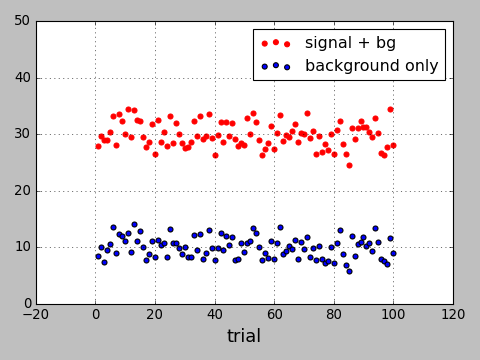

In [6]:
plt.figure()
x = np.linspace(1,n_trials,n_trials)
plt.scatter(x, values_tot, color='r', label='signal + bg')
plt.scatter(x, values_bg, label='background only')
plt.xlabel('trial')
plt.legend()
plt.ylim(0,50)
plt.grid();

#### We can now analyze the data in a different way:
+ calculate 100 individual values for the signal, $s_i$
+ calculate $\bar{s}$, the average of this set of values 
+ calculate $\sigma_s$, the standard deviation of this set of values,
+ calculate $\alpha_s$, the standard error of the derived signal

In [7]:
values_sig = values_tot - values_bg
mean_sig = np.mean(values_sig)
std_sig = np.std(values_sig)
alpha_sig = std_sig/np.sqrt(n_trials -1)
print('signal mean =', mean_sig)
print('uncertainty = ', alpha_sig)

signal mean = 19.92792973777987
uncertainty =  0.09872660912478129


#### Results:
In this scenario, I find that the signal is 

$\mbox{signal} = 19.0 \pm 0.1$

Notice that the uncertainty is reduced by a factor of 3!

### Correlated data

The data is obviously <i>correlated</i>.  When the noise is higher than average, we wouldn't be surpised 
to find the meausured total to be higher than average too. But the correlation isn't perfect because there 
is random noise on the signal as well as the background.

Another way to see that the data is correlated is to make a scatter plot of the measured total vs. the measured 
background.

<IPython.core.display.Javascript object>


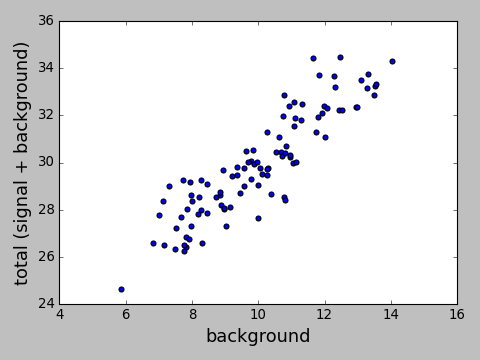

In [8]:
plt.figure()
plt.scatter(values_bg,values_tot)
plt.xlabel('background')
plt.ylabel('total (signal + background)');

This is an example of highly correlated data, with a correlation coefficient close to 1. (See discussion
in H&H starting in the last paragraph of p. 94 and continuing onto p. 95.)  The total increases with increasing 
background, indicating that the correlation coefficient is positive.

### Beyond PHYS 211/212, PHYS 221, and Hughes & Hase Chapter 4

In this section we're going to renalyze the simultaneously acquired data in a different way.

As in H&H 4.2, consider a derived quantity $Z$ that depends on measured values of variables 
$A$ and $B$:

$$
Z = f(A,B).  
$$

If we have determined that 

$$
A = \bar{A} \pm  \alpha_A\quad\quad\mbox{and}\quad\quad B = \bar{B} \pm \alpha_B, 
$$

we say that 

$$
\bar Z = f(\bar A, \bar B),
$$

but what is the value of $\alpha_Z$?

Up until now we have used the rule for combining uncertainties given in H&H Eq. (4.10) on p. 41 (and also 
given in the PHYS 211/212 lab manual):

\begin{eqnarray*}
\alpha_Z^2  &=& \left(\alpha_Z^A\right)^2 + \left(\alpha_Z^B\right)^2\\
            &=& \left(\frac{\partial Z}{\partial A}\right)^2\frac{\sigma_A^2}{N-1}  + 
                   \left(\frac{\partial Z}{\partial B}\right)^2\frac{\sigma_B^2}{N-1}
\end{eqnarray*}


<b>When there are correlations in the measured quantities</b>, we should be using the results presented
in H&H Section 7.3.1 (starting on p. 93).  Equation (7.28) gives the variance of the distribution of $Z$'s:

$$
\sigma_Z^2  = \left(\frac{\partial Z}{\partial A}\right)^2\sigma_A^2  + 
                   \left(\frac{\partial Z}{\partial B}\right)^2\sigma_B^2
              + \frac{2}{N-1}\left.\frac{\partial Z}{\partial A}\right|_{\bar A,\bar B}\,
             \left.\frac{\partial Z}{\partial B}\right|_{\bar A,\bar B}
               \sum_i (A_i - \bar A)(B_i - \bar B),
$$

where the new term in this equation contains the factor defined as the <i>sample covariance</i>; the symbol used 
for the covariance in Hughes &  Hase is $\sigma_{AB}$:

$$
\sigma_{AB} \equiv\frac{1}{N-1} \sum_i (A_i - \bar A)(B_i - \bar B).
$$

<b>NOTE:</b> In the widely used text <i>Data Reduction and Error Analysis for the Physical Sciences</i> by Bevington
and Robinson, the symbol for the covariance is $\sigma^2_{AB}$, which might lead to confusion, because the 
covariance can be negative.  In many treatments the symbol for the covariance is $\mbox{cov}(A,B)$.

Dividing both sides of the equation for $\sigma_Z^2$ above by $N-1$ converts the equation into a relationship between standard errors  

$$
\alpha_Z^2  = \left(\frac{\partial Z}{\partial A}\right)^2\alpha_A^2  + 
                   \left(\frac{\partial Z}{\partial B}\right)^2\alpha_B^2
              + 2\, \frac{\partial Z}{\partial A}\,
                \frac{\partial Z}{\partial B}\frac{\sigma_{AB}}{N-1}.
$$

In the example treated in this notebook, the signal (i.e., $Z$) is just the difference between the 
total and the background (i.e., $Z = A-B$), so 

$$ 
\left.\frac{\partial Z}{\partial A}\right|_{\bar A}\,
              \left.\frac{\partial Z}{\partial B}\right|_{\bar B} = -1
$$

#### Calculating the sample covariance and the correlation coefficient

$$
\sigma_{AB} = \mbox{cov}(A,B) = \frac{1}{N-1}\sum_i (A_i - \bar A)(B_i - \bar B)
$$

$$
\rho_{AB} = \frac{\sigma_{AB}}{\sigma_A\sigma_B}
$$

In [9]:
cov = np.sum((values_tot - mean_tot)*(values_bg - mean_bg))/(n_trials - 1)
print('covariance = ', cov)
cc = cov/np.std(values_tot)/np.std(values_bg)
print('correlation coefficient = ', cc)

covariance =  3.69454311088725
correlation coefficient =  0.9076228744180382


#### Calculating uncertainty in signal

In [10]:
std_sig = np.sqrt(std_tot**2 + std_bg**2 - 2*cov)
print('sample std dev in signal =',std_sig)
print('standard error in signal =',std_sig/np.sqrt(n_trials-1))

sample std dev in signal = 0.9439579065618935
standard error in signal = 0.09487133921076249


#### Results with correlated data

$
\mbox{signal} = 19.94 \pm 0.09
$

### Summary

How do we know if data is correlated or uncorrelated?
+ Think -- Is there reason to think that the data would be correlated?
+ Make a scatter plot of with variables that might be correlated. 
+ Calculate the covariance and the correlation coefficient.  Remember: $ -1< \rho_{AB} < 1$.
Correlation coefficients with magnitudes close to 1 are highly correlated, which should be 
visible in the scatter plots; correlation coefficients near 0 are indicative of uncorrelated 
data.

#### Version details
`version_information` is from J.R. Johansson (jrjohansson at gmail.com); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.

`version_information` is installed on the linux network at Bucknell

In [11]:
%load_ext version_information

In [12]:
%version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.8.2003 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Sat Sep 12 11:28:14 2020 EDT